# Proyecto 2 - Algoritmo del Vendedor Viajero


## $\color{blue}{\text{1. Pregunta de Investigación:}}$

¿Cómo se compara el desempeño del algoritmo simulated annealing con el desempeño del algoritmo genético en la resolución del problema del vendedor viajero para 17 localidades en Costa Rica?

## $\color{blue}{\text{2. Problema:}}$

El problema del vendedor viajero se trata de crear un algoritmo que busque la ruta más óptima entre una cantidad *"n"* de ciudades visitando cada ciudad exactamente una vez y finalizando la ruta en la ciudad donde comenzo. Se utilizarán dos métodos de algoritmos diferentes , el primero será un algoritmo de simulated annealing y el segundo un algoritmo genético.

### $\color{blue}{\text{Alcances y Delimitaciones:}}$


### $\color{blue}{\text{Hipótesis:}}$
*  Al realizar estudios sobre algoritmos metaheurísticos como lo son el simulated annealing (enfriamiento simuldo en español) y algoritmos genéticos es importante generar un balance entre la intensidad de las búsquedas así como la diversificacion que estas pueden tener, es decir, se debe encontrar un resultado con un equilibrio entre la cantidad de esfuerzo realizado para búsquedas locales y globales. Esto con el fin de encontrar regiones con soluciones favorables y no malgastar tiempo en regiones no tan prometedoras o ya exploradas.



## $\color{blue}{\text{3. Metodología:}}$
Para analizar estos diferentes algoritmos probabilísticos se estudiarán los casos teóricos y empíricos de cada uno de ellos.


### $\color{blue}{\text{Procedimiento a Seguir:}}$
Sobre cada uno de los algoritmos se realizarán una serie de pruebas empíricas que nos permitan estudiarlos debidamente y analizarlos junto con los datos teóricos existentes. Para cada una de estas pruebas se graficará la curva de comportamiento de cada una de las pruebas. Estos experimentos se especifican a continuación:


####  $\color{blue}{\text{→  Experimento 1:}}$
* Se procederá a realizar una comparación entre el tiempo de ejecución y cantidad de soluciones encontradas por el algoritmo, estableciendo topes para cantidad de soluciones para cada ejecución. Asimismo se clasificará la calidad de estas soluciones (excelentes, buenas, aceptables o malas). Se ejecutarán pruebas con 10, 30 y 50 soluciones.

####  $\color{blue}{\text{→  Experimento 2:}}$
* Posteriormente, se continuará con analizar la cantidad de parámetros necesarios para que los algoritmos de enfriamiento simulado y algoritmo genético funcionen de la mejor manera. Para ello, se definirán diferentes rangos de parámetros y se estudiará el tiempo que demora en encontrar soluciones con dichas cantidades de parámetros.

### $\color{blue}{\text{Especificaciones del equipo:}}$

Adicionalmente, como bien es sabido, existen una gran cantidad de factores que afectan el rendimiento de cada algoritmo, como lo es, por ejemplo, los recursos disponibles que tenga la máquina para el estudio, compilador e inclusive el lenguaje de programación de estos algoritmos. Es por ello que es importante detallar las especificaciones que estas tienen, y en este caso son las siguientes: 

    -Lenguaje de Programación: Python 3.  
    -Compilador: Jupyter Python.  
    -Procesador: Intel Core i7 de 4ta Generación.  
    -Sistema Operativo: Ubuntu Linux 18.04.5 LTS de 64 bits.  
    -Memoria RAM: 32 Gb.  


### $\color{blue}{\text{Representación:}}$
Para la graficación de los resultados vamos a utilizar la biblioteca matplotlib.


In [7]:
from math import log

xs = range(1, 100)
ys_1 = [x ** 2.01 for x in xs]
ys_2 = [x ** 2 for x in xs]

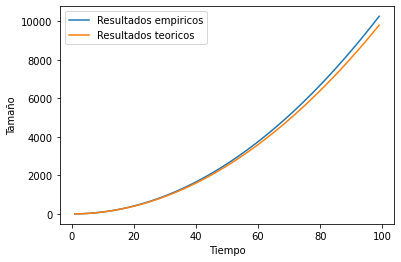

In [8]:
import matplotlib.pyplot as plt

plt.plot(xs, ys_1, label = 'Resultados empiricos')
plt.plot(xs, ys_2, label = 'Resultados teoricos')
plt.ylabel('Tamaño')
plt.xlabel('Tiempo')
plt.legend(loc = 2)
plt.show()

El gráfico anterior solo es una representación no significativa de los graficos y comparaciones que vamos a estar haciendo durante este análisis. 

### $\color{ForestGreen}{\text{Algoritmos a Utilizar:}}$
A continuación se muestra al detalle los algoritmos que se van a utilizar para estas pruebas.


### $\color{ForestGreen}{\text{✰- Algoritmo Genético:}}$

In [9]:
import random as rand

def optimizar(dominio, tam_pobl, porc_elite, prob_mut, reps):
    """Algoritmo genetico para optimizacion estocoastica."""

    poblacion = dominio.generar_n(tam_pobl)
    
    while reps > 0:

        genomas = []
        for sol in poblacion:                       
            aptitud = dominio.fcosto(sol)
            genoma = (sol, aptitud)
            genomas.append(genoma)

        genomas.sort(key=lambda x: x[1])

        for i in range(len(genomas)):
            poblacion[i] = genomas[i][0]

        num_padres = int(len(poblacion) * porc_elite)
        num_hijos = int(len(poblacion) - num_padres)
        sig_gen = poblacion[0:num_padres]
        descendencia = []

        while num_hijos > 0:
            
            x = rand.randrange(0, len(sig_gen))
            y = rand.randrange(0, len(sig_gen))

            while x == y:

                x = rand.randrange(0, len(sig_gen))
                y = rand.randrange(0, len(sig_gen))

            padre_a = sig_gen[x]
            padre_b = sig_gen[y]

            hijo = dominio.cruzar(padre_a, padre_b)
            p = rand.uniform(0, 1)

            if p <= prob_mut:
                hijo = dominio.mutar(hijo)
            descendencia.append(hijo)
            num_hijos = num_hijos - 1

        
        sig_gen += descendencia
        poblacion = sig_gen
        reps = reps - 1

    return poblacion[0]

### $\color{ForestGreen}{\text{✰- Enfriamiento Simulado:}}$

In [13]:
import math
import random


def optimizar(dominio, temperatura = 10e32, tasa_enfriamiento = 0.95):
    """Algoritmo de optimizacion estocastica simulated annealing. """

    solucion = dominio.generar()                                    #genera una solucion al azar
    costo = dominio.fcosto(solucion)                                #se calcula el costo de dicha solucion
    
    while temperatura > 0.01:
        
        solucionP = dominio.vecino(solucion)                        #genera una solucion vecina al azar
        costoP = dominio.fcosto(solucionP)                          #se calcula el costo de la solucion vecina

        p = (math.exp(-(abs(costoP-costo))) ) / temperatura         #math.exp eleva E a la potencia indicada
                                                                    #abs = valor absoluto
        pAzar = random.uniform(0,1)                                 #random.uniform retorna un valor intermedio entre 0 y 1 
                                                                    #de distribucion uniforme
        
        if costoP<costo or pAzar<=p:
            solucion = solucionP
            costo = costoP
        
        temperatura= temperatura * tasa_enfriamiento
    
    return solucion

Antes de empezar con la reproducción de experimentos vamos a importar algunas funciones necesarias para ejecutar las pruebas y los algoritmos que vamos a usar:

In [16]:
import dominio_ag

import levenshtein

import random as rand

import unittest

import algoritmo_genetico_test as AGTest

import simulated_annealing_test as SATest

from abc import ABC

from abc import abstractmethod

from abc import abstractclassmethod

from dominio import Dominio

from math import log

import matplotlib.pyplot as plt

### $\color{ForestGreen}{\text{Reproducción de Experimentos:}}$


### $\color{ForestGreen}{\text{Experimento #1:}}$
* Se comparará el tiempo de ejecución y cantidad de soluciones encontradas por cada algoritmo, estableciendo topes para cantidad de soluciones para cada ejecución. Asimismo se clasificará la calidad de estas soluciones (excelentes, buenas, aceptables o malas). Se ejecutarán pruebas con 10, 30 y 50 soluciones.

    ### $\color{ForestGreen}{\text{ → Algoritmo Genético:}}$
    #### Experimento 1A: 10 soluciones 

In [ ]:
clase, datos_1_AG_exp_1A = big_o(alg.quicksort, 
                     gen.generar_aleatorio,
                     min_n=1, max_n=100,
                     n_measures=100, n_repeats=5,
                     verbose=False, return_raw_data=True,
                     classes=[cls.Linearithmic])

### $\color{blue}{\text{ 4. Análisis de Resultados:}}$


### $\color{blue}{\text{ 5. Conclusiones:}}$